## **LAB 11**

## **To implement SVM using scikit-learn library and train it to classify the given dataset.**


# ***Part A: Basic SVM with Linear Kernel***

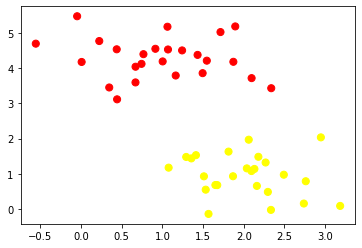

In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


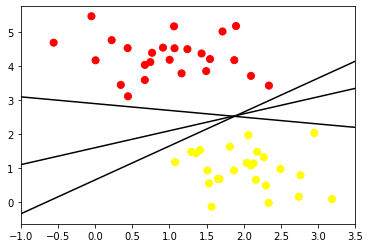

In [2]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

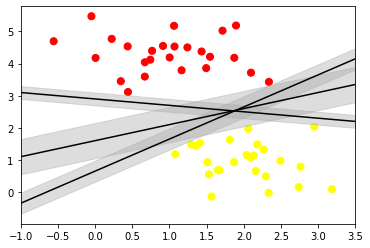

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model);

In [ ]:
def measures(y_true,y_pred):
  print(confusion_matrix(y_true,y_pred))
  return {
      "accuracy":accuracy_score(y_test,y_pred),
      "precision":precision_score(y_test,y_pred,average='micro'),
      "recall":recall_score(y_test,y_pred,average='micro')
  }
  pass

X,y=make_blobs(n_samples=200000,centers=2,n_features=4)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=137)
model=SVC(C=1000,kernel="linear").fit(X_train,y_train)
y_pred=model.predict(X_test)

metrics=measures(y_test,y_pred)

for metric in metrics:
  print(metric,metrics[metric])

[[20058     0]
 [    0 19942]]
accuracy 1.0
precision 1.0
recall 1.0


# ***Part B : Breast Cancer Prediction Example***

Task B.1 : Tweaking C values (hyper param)

Observation B.1.1 : rbf Kernel

C=1 (default ) accuracy : 0.89
C=250 (custom) accuracy : 0.92
Observation B.1.2 : poly Kernel

C=1 (default ) accuracy : 0.92
C=200 (custom) accuracy : 0.92
Observation B.1.3 : sigmoid Kernel

C=1 (default ) accuracy : 0.50
C=200 (custom) accuracy : 0.46
Task B.2 ( Exercise 2 ) : Accuracy precision and recall of model on breast cancer dadtaset

tn : 40 , fp : 7 , fn : 1 , tp : 66

accuracy 0.92

precision 0.90

recall 0.98

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

def measures(y_true,y_pred):
  cmat=confusion_matrix(y_true=y_test,y_pred=y_pred)
  tn, fp, fn, tp=cmat.ravel()
  print("tn : ",tn," , fp : ",fp," , fn : ",fn," , tp : ",tp)
  return {
      "accuracy":(tn+tp)/(tn+fp+fn+tp),
      "precision":(tp)/(fp+tp),
      "recall":(tp)/(fn+tp)
  }
  pass

ds=load_breast_cancer()
X=ds.data
y=ds.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=137)
model=SVC(kernel="linear").fit(X_train,y_train)

y_pred=model.predict(X_test)

metrics=measures(y_test,y_pred)

for metric in metrics:
  print(metric,metrics[metric])

tn :  40  , fp :  7  , fn :  1  , tp :  66
accuracy 0.9298245614035088
precision 0.9041095890410958
recall 0.9850746268656716


# **EXERCISE :**

1. Implement SVM classifier on MNIST dataset, compare the performance of linear, polynomial and RBF kernels.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

def measures(y_true,y_pred):
  return {
      "accuracy":accuracy_score(y_test,y_pred),
      "precision":precision_score(y_test,y_pred,average='micro'),
      "recall":recall_score(y_test,y_pred,average='micro')
  }
  pass

ds=load_digits()
X=ds.data
y=ds.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=137)
model=SVC(C=1,kernel="poly").fit(X_train,y_train)
y_pred=model.predict(X_test)

metrics=measures(y_test,y_pred)

for metric in metrics:
  print(metric,metrics[metric])

accuracy 0.9861111111111112
precision 0.9861111111111112
recall 0.9861111111111112


2. What is the accuracy, precision and recall of the models generated in Part A and Part B.

--> for part a : 
    accuracy : 1.0
    precision : 1.0
    recall : 1.0
    
--> for part b : 
    accuracy : 0.9298
    precision : 0.9041
    recall : 0.9850